<a href="https://colab.research.google.com/github/nutzbee/Capstone-Source-Codes/blob/Notebook-using-Google-Colab-Branch/Capstone_Notebook_Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
df_abbrev = pd.read_excel('https://query.data.world/s/mhptnofytyrvspv3o5d6rpysng5wlx?dws=00000')

In [ ]:
df_abbrev_csv = pd.read_csv('https://query.data.world/s/mtssxlosbayq43a7er4puibse6kpxt?dws=00000')

In [ ]:
df_abbrev_csv = df_abbrev_csv.rename(columns={'ID': 'NDB_No'})

In [ ]:
merged_df = pd.merge(df_abbrev, df_abbrev_csv[['NDB_No', 'Descrip', 'FoodGroup']], on='NDB_No', how='left')

In [ ]:
merged_df2 = pd.read_csv('https://raw.githubusercontent.com/nutzbee/Capstone-Source-Codes/Notebook-using-Google-Colab-Branch/Food%20Dataset%20of%20the%20Philippines%20-%20Combined.csv')

In [2]:
local_df = pd.read_csv('https://raw.githubusercontent.com/nutzbee/Capstone-Source-Codes/Notebook-using-Google-Colab-Branch/Food%20Dataset%20of%20the%20Philippines%20-%20Combined.csv')

In [ ]:
!pip install googlesearch-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for googlesearch-python: filename=googlesearch_python-1.2.3-py3-none-any.whl size=4212 sha256=68f526866720f9b4670e9c8519ef2da3aebee672c2fa250a215c1eaa550ee292
  Stored in directory: /root/.cache/pip/wheels/98/24/e9/6c225502948c629b01cc895f86406819281ef0da385f3eb669
Successfully built googlesearch-python


In [4]:
df = local_df

# Define a function to categorize the foods based on their Food_ID
def categorize_food(food_id):
    category = ''
    if food_id.startswith('A'):
        category = 'GRAINS, STARCHES, OR FLOURS'
    elif food_id.startswith('B'):
        category = 'ROOT VEGETABLES'
    elif food_id.startswith('C'):
        category = 'LEGUMES'
    elif food_id.startswith('D'):
        category = 'VEGETABLES'
    elif food_id.startswith('E'):
        category = 'FRUITS'
    elif food_id.startswith('F'):
        category = 'MEATS'
    elif food_id.startswith('G'):
        category = 'SEAFOODS'
    elif food_id.startswith('H'):
        category = 'PROTEIN FOODS'
    elif food_id.startswith('J'):
        category = 'DAIRY PRODUCTS'
    elif food_id.startswith('K'):
        category = 'FATS AND OILS'
    elif food_id.startswith('M'):
        category = 'DESSERTS'
    elif food_id.startswith('N'):
        category = 'CONDIMENTS'
    elif food_id.startswith('P'):
        category = 'ALCOHOLIC BEVERAGES'
    elif food_id.startswith('Q'):
        category = 'BEVERAGES'
    elif food_id.startswith('R'):
        category = 'MAIN DISHES'
    elif food_id.startswith('S'):
        category = 'MAIN COURSE'
    elif food_id.startswith('T'):
        category = 'PLANT-BASED FOODS'
    return category

# Add a new column 'Category' based on the Food_ID category
df['Category'] = df['Food_ID'].apply(categorize_food)

# Save the transformed dataset as a new CSV file
df.to_csv('transformed_local_foods.csv', index=False)

# Fuzzy test for searching

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import difflib

In [ ]:
df = merged_df

In [ ]:
# Access the column from the dataframe
column_name = 'FoodGroup' 
column_values = df[column_name]

In [ ]:
# Get unique values from the column
unique_values = column_values.unique()

# Print the unique values
for value in unique_values:
    print(value)

Dairy and Egg Products

Spices and Herbs
Baby Foods
Fats and Oils
Poultry Products
Soups, Sauces, and Gravies
Sausages and Luncheon Meats
Breakfast Cereals
Snacks
Fruits and Fruit Juices
Pork Products
Vegetables and Vegetable Products
Nut and Seed Products
Beef Products
Beverages
Finfish and Shellfish Products
Legumes and Legume Products
Lamb, Veal, and Game Products
Baked Products
Sweets
Cereal Grains and Pasta
Fast Foods
Meals, Entrees, and Side Dishes
American Indian/Alaska Native Foods
Restaurant Foods


In [ ]:
# Function to search for words in the food group column and merge the matches
def search_and_merge(words):
    matches = pd.DataFrame()
    for word in words:
        matches = pd.concat([matches, df[df['FoodGroup'].str.contains(word, case=False)]])
    return matches

# Function to provide suggestions for incomplete or misspelled words
def suggest_words(word):
    suggestions = difflib.get_close_matches(word, df['FoodGroup'], n=5, cutoff=0.6)
    return suggestions

# Input word to search
input_words = ['dair','past','snack','baby food', 'nut']  # Example input word

# Search for exact match
exact_matches = search_and_merge(input_words)

# If no exact matches found, provide suggestions
if exact_matches.empty:
    print("No exact matches found. Here are some suggestions:")
    for word in input_words:
        suggestions = suggest_words(word)
        print(f"Suggestions for '{word}': {suggestions}")
else:
    print("Exact matches found:")
    print(exact_matches)

Exact matches found:
      NDB_No                                        Shrt_Desc  Water_(g)  \
0       1001                                 BUTTER,WITH SALT      15.87   
1       1002                           BUTTER,WHIPPED,W/ SALT      16.72   
2       1003                             BUTTER OIL,ANHYDROUS       0.24   
3       1004                                      CHEESE,BLUE      42.41   
4       1005                                     CHEESE,BRICK      41.11   
...      ...                                              ...        ...   
3737   12665             NUTS,ALMONDS,OIL RSTD,LIGHTLY SALTED       2.80   
3738   12695                         ALMOND BUTTER,PLN,W/SALT       1.64   
3739   12698                SESAME BUTTER,TAHINI,KRNLS UNSPEC       3.00   
3740   12737   NUTS,MXD NUTS,OIL RSTD,W/ PNUTS,LIGHTLY SALTED       2.08   
3741   12738  NUTS,MXD NUTS,OIL RSTD,WO/ PNUTS,LIGHTLY SALTED       3.15   

      Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Ash_(g)  Carbohydrt_

# Merging

In [ ]:
df_abbrev.shape

(8790, 53)

In [ ]:
df_abbrev.columns

Index(['NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object')

In [ ]:
df_abbrev_csv.shape

(8618, 45)

In [ ]:
df_abbrev_csv.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [ ]:
merged_df.to_csv('merged.csv', index=False)

# ERROR USING FLASK

In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask import Flask, jsonify, request
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
app = Flask(__name__)

# Load the dataset
df = pd.read_excel("ABBREV.xlsx")

# Preprocess the dataset
# Code for preprocessing goes here
df['GmWt_Desc1'] = pd.to_numeric(df['GmWt_Desc1'], errors='coerce')
df['GmWt_Desc2'] = pd.to_numeric(df['GmWt_Desc2'], errors='coerce')
df['Refuse_Pct'] = pd.to_numeric(df['Refuse_Pct'], errors='coerce')
df['Phosphorus_(mg)'] = pd.to_numeric(df['Phosphorus_(mg)'], errors='coerce')

df['Fiber_TD_(g)'] = pd.to_numeric(df['Fiber_TD_(g)'], errors='coerce')
df['FA_Sat_(g)'] = pd.to_numeric(df['FA_Sat_(g)'], errors='coerce')
df['Cholestrl_(mg)'] = pd.to_numeric(df['Cholestrl_(mg)'], errors='coerce')
df['Sodium_(mg)'] = pd.to_numeric(df['Sodium_(mg)'], errors='coerce')
df['Carbohydrt_(g)'] = pd.to_numeric(df['Carbohydrt_(g)'], errors='coerce')
df['Sugar_Tot_(g)'] = pd.to_numeric(df['Sugar_Tot_(g)'], errors='coerce')
df['Calcium_(mg)'] = pd.to_numeric(df['Calcium_(mg)'], errors='coerce')
df['Iron_(mg)'] = pd.to_numeric(df['Iron_(mg)'], errors='coerce')
df['Potassium_(mg)'] = pd.to_numeric(df['Potassium_(mg)'], errors='coerce')
df['Vit_A_IU'] = pd.to_numeric(df['Vit_A_IU'], errors='coerce')
df['Vit_C_(mg)'] = pd.to_numeric(df['Vit_C_(mg)'], errors='coerce')
df['Vit_E_(mg)'] = pd.to_numeric(df['Vit_E_(mg)'], errors='coerce')
df['Vit_D_IU'] = pd.to_numeric(df['Vit_D_IU'], errors='coerce')

df.fillna(0, inplace=True)

# Apply Standardization
scaler = StandardScaler()
df_std = scaler.fit_transform(df.drop('Shrt_Desc', axis=1))

# Apply PCA for feature extraction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_std)

# Convert principal components to a dataframe
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(principal_df)

@app.route('/')
def index():
  return 'Hello world'

@app.route('/recommend', methods=['POST'])
def recommend():
    data = request.json
    calorie_req = data['calorie_req']
    food_allergy = data['food_allergy']
    nutrient_req = data['nutrient_req']
    
    # Filter the dataset based on user input
    filtered_df = df[(df['Energ_Kcal'] <= float(calorie_req)) & (~df['Shrt_Desc'].str.contains(food_allergy, na=False))]
    filtered_df = filtered_df.sort_values(by=[nutrient_req], ascending=False)
    
    # Apply K-Means clustering algorithm to the filtered data
    principal_components = pca.transform(filtered_df.drop('Shrt_Desc', axis=1))
    principal_df_filtered = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    y_kmeans = kmeans.predict(principal_df_filtered)
    principal_df_filtered['cluster'] = y_kmeans
    
    # Get recommendations for the user
    recommended_foods = []
    for i in range(3):
        cluster_df = principal_df_filtered[principal_df_filtered['cluster'] == i]
        cluster_foods = filtered_df[filtered_df.index.isin(cluster_df.index)]
        if len(cluster_foods) > 0:
            recommended_foods.append(cluster_foods.iloc[0]['Shrt_Desc'])
    
    return jsonify({'recommended_foods': recommended_foods})

if __name__ == '__main__':
    app.run(debug=True, port=5000)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# Type-2 Diabetes Prediction Test

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

In [ ]:
# Apply Standardization
scaler = StandardScaler()
df_std = scaler.fit_transform(df.drop('Outcome', axis=1))

# Apply PCA for feature extraction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_std)

# Convert principal components to a dataframe
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

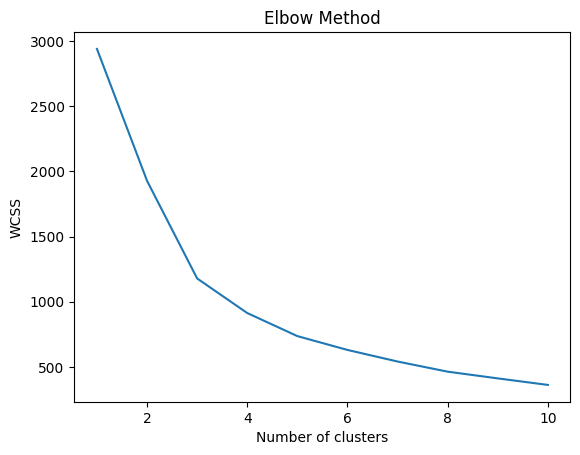

Accuracy of K-Means clustering algorithm: 67.45%


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Apply K-Means clustering algorithm and elbow method to identify diabetic and non-diabetic patients
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, select the number of clusters (e.g. 2)
n_clusters = 2

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(principal_df)
y_kmeans = kmeans.predict(principal_df)

# Evaluate the accuracy of the clustering
labels_true = df['Outcome']
accuracy = accuracy_score(labels_true, y_kmeans)
print("Accuracy of K-Means clustering algorithm: {:.2f}%".format(accuracy * 100))


In [ ]:
# Get user input
input_features = []
for feature in df.columns[:-1]:
    value = input("Enter {} value: ".format(feature))
    input_features.append(float(value))

# Identify the user as diabetic or non-diabetic
user_df = pd.DataFrame([input_features], columns=df.columns[:-1])
user_std = scaler.transform(user_df)
user_pc = pca.transform(user_std)
user_label = kmeans.predict(user_pc)[0]

if user_label == 0:
    print("You are diagnosed as a non-diabetic patient.")
else:
    print("You are diagnosed as a type-2 diabetic patient.")


Enter Pregnancies value: 0
Enter Glucose value: 0
Enter BloodPressure value: 0
Enter SkinThickness value: 0
Enter Insulin value: 0
Enter BMI value: 0
Enter DiabetesPedigreeFunction value: 0
Enter Age value: 22
You are diagnosed as a non-diabetic patient.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
if user_label == 0:
    # User is non-diabetic, recommend any food
    # Code for recommending any food goes here
    print("Wala kang diabetes")
else:
    # User is type-2 diabetic, recommend suitable foods
    # Code for recommending suitable foods goes here
    print("May diabetes ka")

Wala kang diabetes


# EDA Test using CountVectorizer & TFIDvectorizer. We disregard because using feature extraction provides highes silhouette score than these two based on our implementations. Disregard this cells.

In [ ]:
data = pd.read_csv('https://query.data.world/s/bn4zzv3dzqdf6nwlbvbpryimitkdey?dws=00000')

In [ ]:
data.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object to extract features from the 'long_desc' column
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit the vectorizer to the 'long_desc' column
features = vectorizer.fit_transform(data['Descrip'])

# Convert the features to a DataFrame
features_df = pd.DataFrame(features.toarray(), columns=vectorizer.vocabulary_)

# Concatenate the features DataFrame with the original data
data_with_features = pd.concat([data, features_df], axis=1)

# Print the first five rows of the data with features
print(data_with_features.head())

     ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  bannock  plains  indians  steller  applebee  kid  \
0       0.85  81.11  ...        0       0        0        0         0    0

In [ ]:
from sklearn.cluster import KMeans

# Fit a KMeans clustering model to the features
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(features_df)

# Assign each food to a cluster based on its features
data['cluster'] = kmeans.predict(features_df)

# Define a function to recommend foods based on the clusters
def recommend_foods(food_id, num_recommendations):
    cluster = data.loc[data['ID'] == food_id, 'cluster'].iloc[0]
    cluster_foods = data.loc[data['cluster'] == cluster]
    recommendations = cluster_foods.sort_values('cluster', ascending=False).head(num_recommendations)
    return recommendations

# Test the recommender system by recommending 5 foods similar to food ID 1102
recommendations = recommend_foods(90240, 5)
print(recommendations)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         ID                       FoodGroup                    ShortDescrip  \
116    1128          Dairy and Egg Products               EGG,WHL,CKD,FRIED   
4675  15225  Finfish and Shellfish Products  YELLOWTAIL,MXD SP,CKD,DRY HEAT   
4664  15214  Finfish and Shellfish Products    SEATROUT,MXD SP,CKD,DRY HEAT   
4665  15215  Finfish and Shellfish Products      SHAD,AMERICAN,CKD,DRY HEAT   
4666  15216  Finfish and Shellfish Products            SPOT,COOKED,DRY HEAT   

                                                Descrip CommonName MfgName  \
116                           Egg, whole, cooked, fried        NaN     NaN   
4675  Fish, yellowtail, mixed species, cooked, dry heat        NaN     NaN   
4664    Fish, seatrout, mixed species, cooked, dry heat        NaN     NaN   
4665             Fish, shad, american, cooked, dry heat        NaN     NaN   
4666                       Fish, spot, cooked, dry heat        NaN     NaN   

     ScientificName  Energy_kcal  Protein_g  Fat_g  ... 

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(features_df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.08


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create a CountVectorizer object to extract features from the 'Descrip' column
vectorizer = TfidfVectorizer(stop_words='english', max_features=1250)

# Fit the vectorizer to the 'Descrip' column
features = vectorizer.fit_transform(data['Descrip'])

# Convert the features to a DataFrame
features_df = pd.DataFrame(features.toarray(), columns=vectorizer.vocabulary_)

# Concatenate the features DataFrame with the original data
data_with_features = pd.concat([data, features_df], axis=1)

# Print the first five rows of the data with features
print(data_with_features.head())

     ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  kid  menu  friday  platter  barrel  denny  carrabba  \
0       0.85  81.11  ...  0.0   0.0     0.0      0.0     0.0    0.0    

In [ ]:
# Fit a KMeans clustering model to the features
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(features_df)

# Assign each food to a cluster based on its features
data['cluster'] = kmeans.predict(features_df)

# Define a function to recommend foods based on the clusters
def recommend_foods(food_id, num_recommendations):
    cluster = data.loc[data['ID'] == food_id, 'cluster'].iloc[0]
    cluster_foods = data.loc[data['cluster'] == cluster]
    recommendations = cluster_foods.sort_values('cluster', ascending=False).head(num_recommendations)
    return recommendations

# Test the recommender system by recommending 5 foods similar to food ID 90240
recommendations = recommend_foods(90240, 5)
print(recommendations)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         ID               FoodGroup  \
0      1001  Dairy and Egg Products   
5817  18375          Baked Products   
5815  18373          Baked Products   
5814  18372          Baked Products   
5813  18371          Baked Products   

                                   ShortDescrip  \
0                              BUTTER,WITH SALT   
5817  LEAVENING AGENTS,YEAST,BAKER'S,ACTIVE DRY   
5815             LEAVENING AGENTS,CRM OF TARTAR   
5814               LEAVENING AGENTS,BAKING SODA   
5813     LEAVENING AGENTS,BAKING PDR,LOW-SODIUM   

                                           Descrip CommonName MfgName  \
0                                   Butter, salted        NaN     NaN   
5817  Leavening agents, yeast, baker's, active dry        NaN     NaN   
5815             Leavening agents, cream of tartar        NaN     NaN   
5814                 Leavening agents, baking soda        NaN     NaN   
5813   Leavening agents, baking powder, low-sodium        NaN     NaN   

     ScientificName

In [ ]:
# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(features_df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.03


# This part is for personal use. Trial and error. Disregard.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df = pd.read_excel("ABBREV.xlsx")

# Remove columns that are not required
columns_to_drop = ['Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2', 'Refuse_Pct', 'Phosphorus_(mg)']
df.drop(columns_to_drop, axis=1, inplace=True)

# Drop rows with missing values
df.fillna(0, inplace=True)

# Convert categorical variables to numerical variables
df['Shrt_Desc'] = pd.to_numeric(df['Shrt_Desc'], errors='coerce')
df['GmWt_Desc1'] = pd.to_numeric(df['GmWt_Desc1'], errors='coerce')
df['GmWt_Desc2'] = pd.to_numeric(df['GmWt_Desc2'], errors='coerce')
df['Refuse_Pct'] = pd.to_numeric(df['Refuse_Pct'], errors='coerce')
df['Phosphorus_(mg)'] = pd.to_numeric(df['Phosphorus_(mg)'], errors='coerce')

df['Fiber_TD_(g)'] = pd.to_numeric(df['Fiber_TD_(g)'], errors='coerce')
df['FA_Sat_(g)'] = pd.to_numeric(df['FA_Sat_(g)'], errors='coerce')
df['Cholestrl_(mg)'] = pd.to_numeric(df['Cholestrl_(mg)'], errors='coerce')
df['Sodium_(mg)'] = pd.to_numeric(df['Sodium_(mg)'], errors='coerce')
df['Carbohydrt_(g)'] = pd.to_numeric(df['Carbohydrt_(g)'], errors='coerce')
df['Sugar_Tot_(g)'] = pd.to_numeric(df['Sugar_Tot_(g)'], errors='coerce')
df['Calcium_(mg)'] = pd.to_numeric(df['Calcium_(mg)'], errors='coerce')
df['Iron_(mg)'] = pd.to_numeric(df['Iron_(mg)'], errors='coerce')
df['Potassium_(mg)'] = pd.to_numeric(df['Potassium_(mg)'], errors='coerce')
df['Vit_A_IU'] = pd.to_numeric(df['Vit_A_IU'], errors='coerce')
df['Vit_C_(mg)'] = pd.to_numeric(df['Vit_C_(mg)'], errors='coerce')
df['Vit_E_(mg)'] = pd.to_numeric(df['Vit_E_(mg)'], errors='coerce')
df['Vit_D_IU'] = pd.to_numeric(df['Vit_D_IU'], errors='coerce')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_normalized = pd.DataFrame(scaled_data, columns=df.columns)

# Apply feature extraction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_normalized)

principal_df = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

# Apply elbow method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(principal_df)
y_kmeans = kmeans.predict(principal_df)

# Combine Feature Extraction and K-Means Clustering
principal_df['cluster'] = y_kmeans

# Calculate the Silhouette Coefficient
from sklearn.metrics import silhouette_score

score = silhouette_score(principal_df.drop('cluster', axis=1), y_kmeans)
print("Silhouette Coefficient:", score)

# Feature Extraction and K-means clustering for food recommendations for type-2 diabetic patients

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = merged_df2

In [ ]:
from googlesearch import search

def categorize_food(food_name):
    query = f"{food_name} category"
    try:
        for result in search(query, num_results=1):
            return result.split(" - ")[0]
    except:
        return "Category not found"

# Apply the categorize_food function to each food item in the DataFrame
df["Category"] = df["Food name and Description"].apply(categorize_food)

<ipython-input-19-afc3794c5c54>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Category"] = df["Food name and Description"].apply(categorize_food)


In [ ]:
df['Category'].sample(10)

955                                    Category not found
944                                    Category not found
1009                                   Category not found
499                                    Category not found
1539                                   Category not found
352                                    Category not found
1114                                   Category not found
47      https://www.masterclass.com/articles/how-to-ma...
1471                                   Category not found
1404                                   Category not found
Name: Category, dtype: object

In [ ]:
df = df[(df['Sugar_Tot_(g)'] <= 10) & (df['Fiber_TD_(g)'] >= 5) & (df['Carbohydrt_(g)'] < 55)]
df = df.sort_values(by=['Protein_(g)'], ascending=False)

KeyError: ignored

In [ ]:
#New dataset
df = df[(df['Carbohydrate, total (g)'] < 55)]

In [ ]:
# Preprocess the dataset
# Code for preprocessing goes here
numeric_cols = ['GmWt_Desc1', 'GmWt_Desc2', 'Refuse_Pct', 'Phosphorus_(mg)', 'Fiber_TD_(g)',
                'FA_Sat_(g)', 'Cholestrl_(mg)', 'Sodium_(mg)', 'Carbohydrt_(g)', 'Sugar_Tot_(g)',
                'Calcium_(mg)', 'Iron_(mg)', 'Potassium_(mg)', 'Vit_A_IU', 'Vit_C_(mg)', 'Vit_E_(mg)',
                'Vit_D_IU']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df['Descrip'] = df['Descrip'].fillna('No name')
df['FoodGroup'] = df['FoodGroup'].fillna('Hnknown Food group')
df.fillna(0, inplace=True)

KeyError: ignored

In [ ]:
#new Dataset
# Preprocess the dataset
# Code for preprocessing goes here
df.fillna(0, inplace=True)

<ipython-input-7-65dbf66f35d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [ ]:
# Remove Outliers
# In these method of removing outliers we are just testing if the accuracy would increase
# It increases but since we have food dataset we do not want to remove any rows so this method is not used in the actual coding of flask
# this is part of EDA
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-69-873c5d26d932>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-69-873c5d26d932>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-69-873c5d26d932>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df.isnull().sum()

Food_ID                      0
Food name and Description    0
Alternate/Common name(s)     0
Water (g)                    0
Energy, calculated (kcal)    0
Protein (g)                  0
Total Fat (g)                0
Carbohydrate, total (g)      0
Ash, total (g)               0
Image Link                   0
dtype: int64

In [ ]:
# Apply Standardization
scaler = StandardScaler()
df_std = scaler.fit_transform(df.drop(['Food_ID', 'Food name and Description', 'Alternate/Common name(s)', 'Image Link'], axis=1))

# Apply PCA for feature extraction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_std)

# Convert principal components to a dataframe
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [ ]:
# Get user input
calorie_req = input("Enter your calorie requirement: ")
food_allergy = input("Enter any food allergies: ")
#nutrient_req = input("Enter your preferred nutrient values (e.g. protein, fiber): ")
# I commented out this input here and make it static but in the actual flask code this input is needed from the user

Enter your calorie requirement: 200
Enter any food allergies: ube


In [ ]:
# Filter the dataset based on user input
filtered_df = df[(df['Energy, calculated (kcal)'] <= float(calorie_req)) & (~df['Food name and Description'].str.contains(food_allergy, na=False))]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

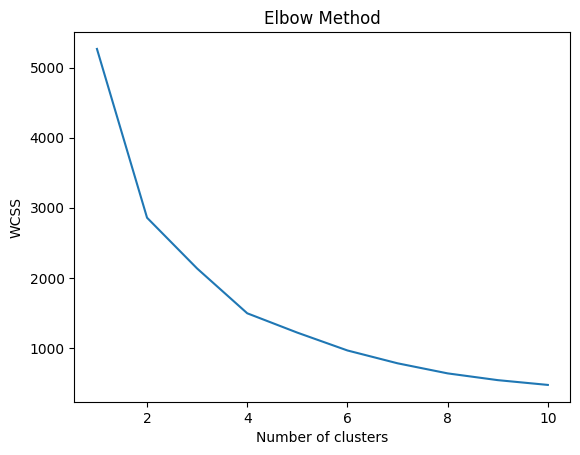

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Apply K-Means clustering algorithm and elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, select the number of clusters
n_clusters = 3

# Apply K-Means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(principal_df)
y_kmeans = kmeans.predict(principal_df)


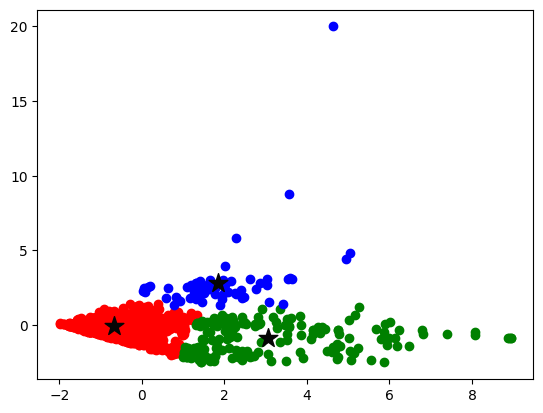

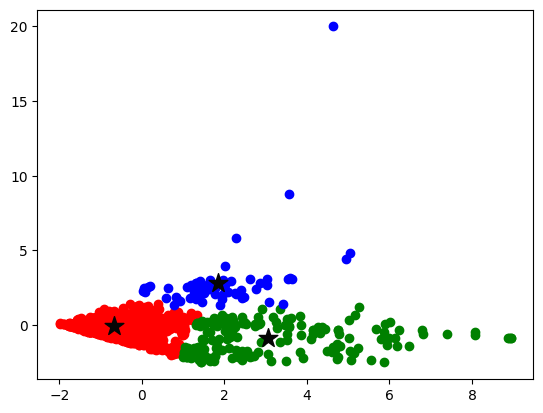

In [ ]:
# Initialize centroids and colors
centroids = kmeans.cluster_centers_
colors = ['r', 'g', 'b', 'cyan']

# Plot initial centroids and data points
fig, ax = plt.subplots()
for i in range(n_clusters):
    ax.scatter(principal_df[y_kmeans == i]['PC1'], principal_df[y_kmeans == i]['PC2'], c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')

# Update centroids until convergence
while True:
    # Assign each data point to the nearest centroid
    old_centroids = centroids
    y_kmeans = kmeans.predict(principal_df)
    centroids = kmeans.cluster_centers_
    
    # Plot updated centroids and data points
    fig, ax = plt.subplots()
    for i in range(n_clusters):
        ax.scatter(principal_df[y_kmeans == i]['PC1'], principal_df[y_kmeans == i]['PC2'], c=colors[i])
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    
    # Check for convergence
    if (old_centroids == centroids).all():
        break

In [ ]:
# Combine Feature Extraction and K-Means Clustering
principal_df['cluster'] = y_kmeans


In [ ]:
# Get recommendations for the user
# This method is used in actual flask code I just used different approach here to experiment
recommended_foods = []
for i in range(n_clusters):
    cluster_df = principal_df[principal_df['cluster'] == i]#.drop('cluster', axis=1)
    #cluster_df = pd.merge(cluster_df, df, left_index=True, right_index=True)
    #cluster_df = cluster_df.sort_values(by=['Protein_(g)'], ascending=False)
    index_list = cluster_df.index.tolist()
    cluster_food_df = df.iloc[index_list,:]
    #cluster_foods = filtered_df[filtered_df.index.isin(cluster_df.index)] 
    if not cluster_food_df.empty:  # add check for empty DataFrame
      recommended_foods.append(cluster_food_df.iloc[0]['Food name and Description'])
    
print("Recommended foods for you:")
for food in recommended_foods:
    print("- " + food)

Recommended foods for you:
- Corn on cob, white
- Rice, milled, glutinous, milled w/ water
- Soybean cheese, salted


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

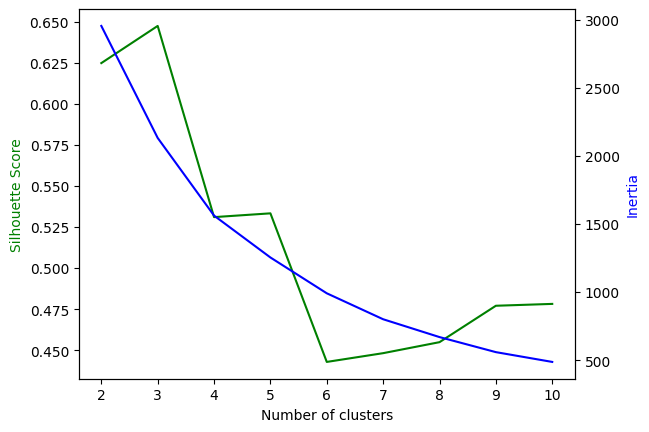

In [ ]:
# Evaluate the system
from sklearn.metrics import silhouette_score

silhouette_scores = []
inertia_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(principal_df)
    labels = kmeans.predict(principal_df)
    silhouette_avg = silhouette_score(principal_df, labels)
    inertia = kmeans.inertia_
    silhouette_scores.append(silhouette_avg)
    inertia_scores.append(inertia)

# Plot evaluation metrics
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(range(2, 11), silhouette_scores, 'g-', label='Silhouette Score')
ax2.plot(range(2, 11), inertia_scores, 'b-', label='Inertia')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette Score', color='g')
ax2.set_ylabel('Inertia', color='b')
plt.show()


In [ ]:
#The feature extraction method that we used is the Principal Component Analysis
#The MATRIX that we used is called Principal Components Matrix
print(principal_df)

           PC1       PC2  cluster
0     0.209384 -1.214331        0
1     0.565820 -1.426070        0
2     0.482655 -1.478497        0
3     1.122476 -2.067658        1
4    -0.126860 -1.111023        0
...        ...       ...      ...
1290  3.346086  1.116189        1
1291  2.464817  1.872937        2
1292 -1.904259  0.072681        0
1293  3.349055 -1.112777        1
1294  0.111046 -0.076827        0

[1295 rows x 3 columns]


In [ ]:
df['Food_ID'].sample(20) #disregard this, just for checking

797     F080
167     A173
287     C048
752     F033
845     F130
1180    G200
644     E046
831     F116
778     F059
385     D082
1077    G094
1398    Q048
185     A191
1455    R045
1206    G227
992     G009
1339    N023
1140    G163
1244    J014
691     E095
Name: Food_ID, dtype: object

# Burned Calories Prediction based on the dataset provided

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Load exercise dataset from CSV
exercise_data = pd.read_csv('https://raw.githubusercontent.com/nutzbee/Capstone-Source-Codes/Flask-App-using-VS-Code/exercise_dataset.csv')

# Preprocess the exercise data
exercise_activities = exercise_data['Activity, Exercise or Sport (1 hour)'].tolist()
burned_calories = exercise_data['Calories per kg'].tolist()

# Create a dictionary to map activity labels to numerical values
activity_labels = {activity: i for i, activity in enumerate(set(exercise_activities))}
exercise_labels = [activity_labels[activity] for activity in exercise_activities]

# Create a one-hot encoding for activity labels
one_hot_activities = pd.get_dummies(exercise_labels, prefix='Activity')

# Concatenate the burned_calories and one-hot activity dataframes
X = pd.concat([pd.DataFrame(burned_calories, columns=['Calories']), one_hot_activities], axis=1)

# Apply k-means clustering
num_clusters = 2  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Analyze cluster labels to determine health status
def assess_health(cluster_labels):
    # Count the occurrences of each cluster label
    cluster_counts = pd.Series(cluster_labels).value_counts()

    # Determine the dominant cluster
    dominant_cluster = cluster_counts.idxmax()

    # Determine health status based on dominant cluster
    if cluster_labels.tolist().count(dominant_cluster) == len(cluster_labels):
        return "Healthy"
    else:
        return "Not Healthy"

# Display available exercise activities to the user
available_activities = sorted(set(exercise_activities))
print("Available exercise activities:")
for i, activity in enumerate(available_activities):
    print(f"{i + 1}. {activity}")

# Get user input for exercise activity
activity_choice = int(input("Enter the number corresponding to your exercise activity: "))

# Check if the activity choice is valid
if activity_choice > 0 and activity_choice <= len(available_activities):
    # Get the selected activity
    exercise_activity = available_activities[activity_choice - 1]
    
    # Get user input for exercise duration
    exercise_duration = float(input("Enter the exercise duration in minutes: "))

    # Find matching exercise activity in the dataset
    matching_activity = exercise_data[exercise_data['Activity, Exercise or Sport (1 hour)'] == exercise_activity]

    # Check if a matching activity is found
    if not matching_activity.empty:
        # Calculate burned calories based on user input
        user_burned_calories = matching_activity['Calories per kg'].values[0] * exercise_duration

        # Update X with user input
        user_X = pd.DataFrame([[user_burned_calories] + [0] * len(activity_labels)], columns=['Calories'] + list(one_hot_activities.columns))

        # Combine X and user_X
        combined_X = pd.concat([X, user_X], ignore_index=True)

        # Apply k-means clustering with updated data
        kmeans.fit(combined_X)

        # Get updated cluster labels
        updated_cluster_labels = kmeans.labels_

        # Assess health status based on updated cluster labels
        health_status = assess_health(updated_cluster_labels)
        print("Health Status:", health_status)
    else:
        print("Exercise activity not found in the dataset.")
else:
    print("Invalid activity choice. Please try again.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Available exercise activities:
1. Aerobics, general
2. Aerobics, high impact
3. Aerobics, low impact
4. Aerobics, step aerobics
5. Archery
6. Backpacking, Hiking with pack
7. Badminton
8. Bagging grass, leaves
9. Ballet, twist, jazz, tap
10. Ballroom dancing, fast
11. Ballroom dancing, slow
12. Basketball game, competitive
13. Basketball, officiating
14. Basketball, shooting baskets
15. Basketball, wheelchair
16. Bathing dog
17. Billiards
18. Bird watching
19. Boating, power, speed boat
20. Bowling
21. Boxing, in ring
22. Boxing, punching bag
23. Boxing, sparring
24. Calisthenics, light
25. Calisthenics, vigorous, pushups, situps…
26. Canoeing, camping trip
27. Canoeing, rowing, light
28. Canoeing, rowing, moderate
29. Canoeing, rowing, vigorous
30. Carpentry, general
31. Carrying 16 to 24 lbs, upstairs
32. Carrying 25 to 49 lbs, upstairs
33. Carrying heavy loads
34. Carrying infant, level ground
35. Carrying infant, upstairs
36. Carrying moderate loads upstairs
37. Carrying small chil

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18229546431048216


In [ ]:
# Load the dataset
df = pd.read_csv('exercise_dataset.csv')


In [ ]:
df.columns

Index(['Activity, Exercise or Sport (1 hour)', '130 lb', '155 lb', '180 lb',
       '205 lb', 'Calories per kg'],
      dtype='object')

In [ ]:
# Extract the relevant columns
X = df.iloc[:, 1:-1].values  # Columns 2 to 5 (weights for different lbs)
y = df.iloc[:, -1].values    # Last column (calories per lb)
activities = df.iloc[:, 0].values  # First column (activities)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

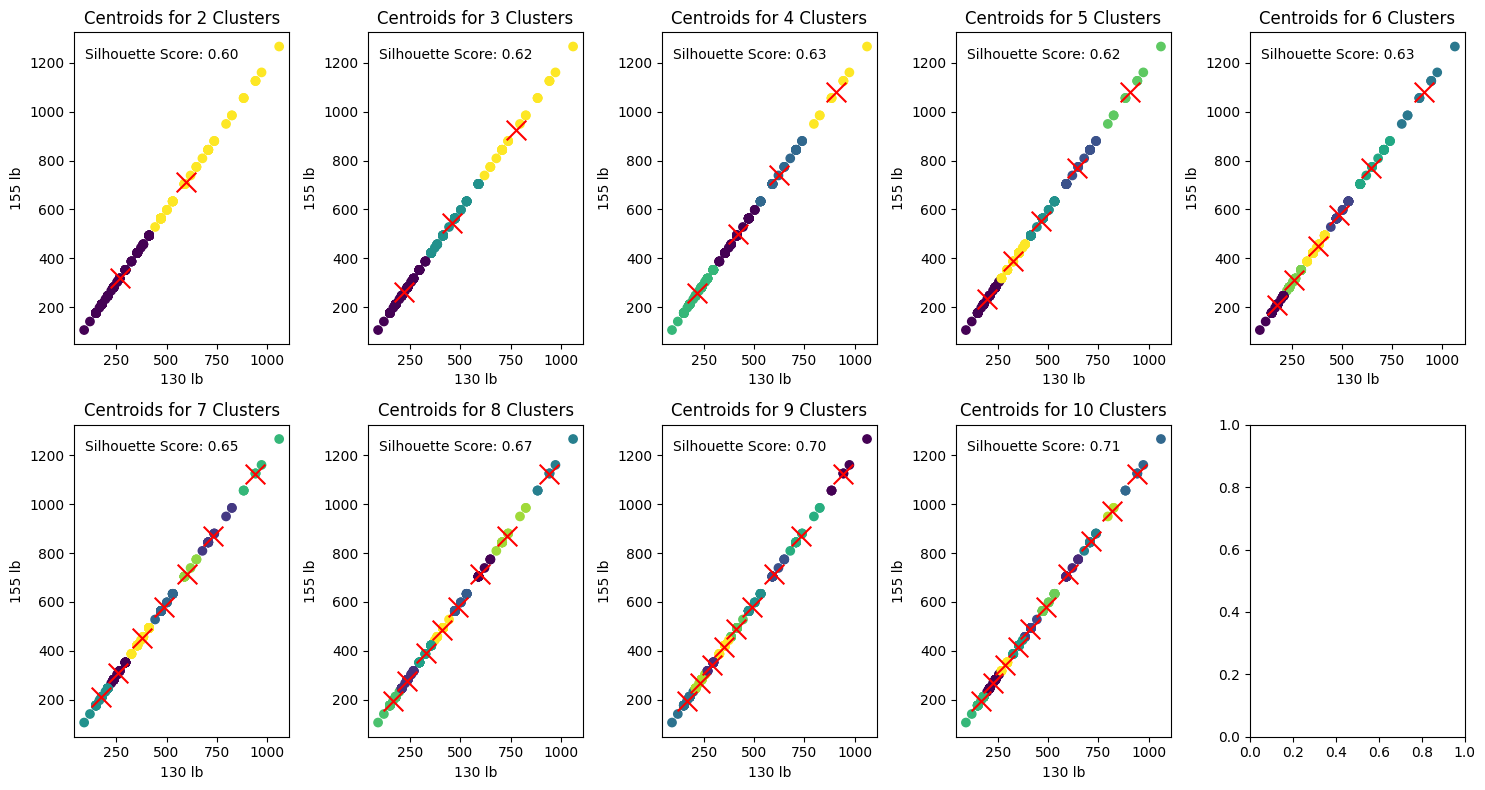

In [ ]:
# Perform k-means clustering with different number of clusters
n_clusters_range = range(2, 11)
inertias = []
silhouette_scores = []
fig, ax = plt.subplots(2, 5, figsize=(15, 8))
ax = ax.ravel()

for i, n_clusters in enumerate(n_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    if n_clusters > 1:
        # Silhouette score is not defined for a single cluster
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Plot the centroids for current iteration
    ax[i].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
    ax[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
    ax[i].set_title(f'Centroids for {n_clusters} Clusters')
    ax[i].set_xlabel('130 lb')
    ax[i].set_ylabel('155 lb')
    ax[i].text(0.05, 0.95, f"Silhouette Score: {silhouette_scores[-1]:.2f}", transform=ax[i].transAxes, ha='left', va='top')


plt.tight_layout()
plt.show()

In [ ]:
# Based on the plots, you can choose the optimal number of clusters
optimal_n_clusters = int(input("Enter the optimal number of clusters based on the plots: "))
# I just used this to try int input in jupyter notebooks
# Based on the visualization, silhouette score is higher with 10 clusters so I just chosed 10
# In actual flask coding this input will not be coming from the user

Enter the optimal number of clusters based on the plots: 10


In [ ]:
# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

In [ ]:
# Get user input for weight in lbs
user_weight_lb = float(input("Enter your weight in lbs: "))
# As for my weight in lbs

Enter your weight in lbs: 134.482


In [ ]:
# Get user input for exercise or activity
# I used index of the activities for the input here
print("Select an exercise or activity:")
for i, activity in enumerate(activities):
    print(f"{i+1}. {activity}")
selected_activity_index = int(input("Enter the index of the exercise or activity: ")) - 1
selected_activity = activities[selected_activity_index]

Select an exercise or activity:
1. Cycling, mountain bike, bmx
2. Cycling, <10 mph, leisure bicycling
3. Cycling, >20 mph, racing
4. Cycling, 10-11.9 mph, light
5. Cycling, 12-13.9 mph, moderate
6. Cycling, 14-15.9 mph, vigorous
7. Cycling, 16-19 mph, very fast, racing
8. Unicycling
9. Stationary cycling, very light
10. Stationary cycling, light
11. Stationary cycling, moderate
12. Stationary cycling, vigorous
13. Stationary cycling, very vigorous
14. Calisthenics, vigorous, pushups, situps…
15. Calisthenics, light
16. Circuit training, minimal rest
17. Weight lifting, body building, vigorous
18. Weight lifting, light workout
19. Health club exercise
20. Stair machine
21. Rowing machine, light
22. Rowing machine, moderate
23. Rowing machine, vigorous
24. Rowing machine, very vigorous
25. Ski machine
26. Aerobics, low impact
27. Aerobics, high impact
28. Aerobics, step aerobics
29. Aerobics, general
30. Jazzercise
31. Stretching, hatha yoga
32. Mild stretching
33. Instructing aerobic cl

In [ ]:
# Predict the cluster for the user weight
user_weight_arr = [user_weight_lb] * (X.shape[1])  # Duplicate user weight for all lb columns
user_cluster = kmeans.predict([user_weight_arr])[0]

In [ ]:
# Extract the calories burned per lb for the user weight and cluster
user_calories_per_lb = y[kmeans.labels_ == user_cluster][0]

In [ ]:
# Calculate the total calories burned during the selected exercise or activity for the user weight
selected_activity_calories = y[selected_activity_index]
total_calories_burned = user_calories_per_lb * user_weight_lb * (selected_activity_calories / user_calories_per_lb)

print(f"You burn approximately {total_calories_burned} calories during {selected_activity} at {user_weight_lb} lbs.")

You burn approximately 332.31321135164205 calories during Cycling, 16-19 mph, very fast, racing at 134.482 lbs.
